In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

import utils 


In [2]:
x = pd.read_csv("../Data_Crowdsourced_Mapping/training.csv",sep=",")
#x = pd.read_csv("../Data_Crowdsourced_Mapping/testing.csv",sep=",")

In [3]:
k = len(set(x["class"]))
k

6

In [4]:
x_quant = x.drop(columns=["class"])
km = KMeans(n_clusters=k,init="random")
km.fit(x_quant)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [5]:
adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0]) 
adjusted_rand_score(km.labels_,x['class'])

0.3220304553422424

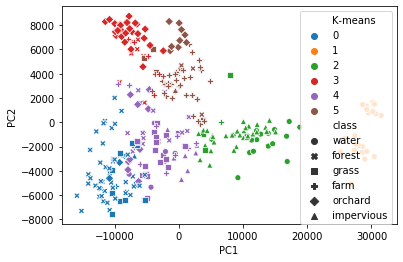

In [6]:
labels = pd.Series(km.labels_, name="K-means")
utils.scatterplot_pca(data=x_quant, hue=labels, style=x["class"])
plt.show()